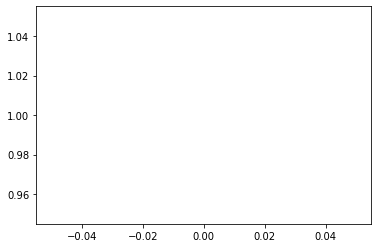

In [1]:
import matplotlib.pyplot as plt
plt.plot([1])

In [3]:
from typing import List
from MyDetection import MyDetection
from MyRecognizer import MyRecognizer
from util.my_utils import sorting_bounding_box, convert_to_index_box,get_text_from_points,image_box_show_1,image_box_show, sorting_bounding_box_v2
from config_rec import all_alph
import cv2
from PIL import Image
import numpy as np


class MyOcrModel:
    def __init__(self,path_model_detect, model_path, all_alph, version_detect = 'v2') -> None:        
        
        #path_model_detect = 'output/model/FastRCNN_resnet50_30.pth'
        #model_path = 'output/model_rec_text_best_scale_2/CRNN_LSTM_min_loss.pth'
        self.detect_model = MyDetection(path_model_detect, version_detect=version_detect)
        self.rec_model = MyRecognizer(model_path, all_alph)
        self.isRecording = False
        self.images, self.boxes = None, None
        
    def get_image_with_box_from_path(self, path_image):
        img = Image.open(path_image).convert("RGB")
        return self.get_image_with_box(img)
    
    def get_image_with_box(self, img:Image.Image):
        # img = Image.open(path_image).convert("RGB")
        if not self.isRecording:
            self.images, self.boxes = self.detect_model.detect_images(img)
        color = (255,0,0)
        for box in self.boxes:
            p1,p2 = (int(box[0]),int(box[1])),(int(box[2]),int(box[3]))
            img = np.asarray(img)            
            img = cv2.rectangle(img,p1,p2,color,1)
        return img

    
    def recognize_image(self, image:Image.Image)->List[str]:
        self.isRecording = False
        self.images, self.boxes = self.detect_model.detect_images(image)
        self.isRecording = True
        
        return self._rec_image_get_texts(self.images, self.boxes)

    def _rec_image_get_texts(self, images, boxes):
        text_boxes = []
        for img, boxe in zip(images,boxes):
            img = self.rec_model.processing_image(img)
            text = self.rec_model.get_text_from_image(img)
            text_boxes.append([text, boxe.numpy()])
        
        text_boxes = sorting_bounding_box_v2(text_boxes)
        result_texts = get_text_from_points(text_boxes)
        
        return result_texts
    
    def recognize_image_file(self, path_image:str)->List[str]:        

        images, boxes = self.detect_model.detect_images_path(path_image)
        
        return self._rec_image_get_texts(images, boxes)
            
            
path_model_detect = 'output/model_best/FastRCNN_resnet50_min_loss.pth' 
path_model_rec = 'output/model_rec_text_best_scale_2/CRNN_LSTM_min_loss.pth'

ocr_model = MyOcrModel(path_model_detect, path_model_rec, all_alph,version_detect = 'v1')

# texts = ocr_model.recognize_image_file('MyExample/im_20230301_181215.jpg')
# print(*texts,sep='\n')
# s e l ec t +
# f r om s st sta' t a aff f f в вmp! тр р l о vee юу y e @e e
# wh e e e - ш fis i i/ _sp s р l а  v м } ame !e l ike v ke т q ча %al- l e: eksex ks ey д kort о l bov% ю п



Loading from output/model_rec_text_best_scale_2/CRNN_LSTM_min_loss.pth


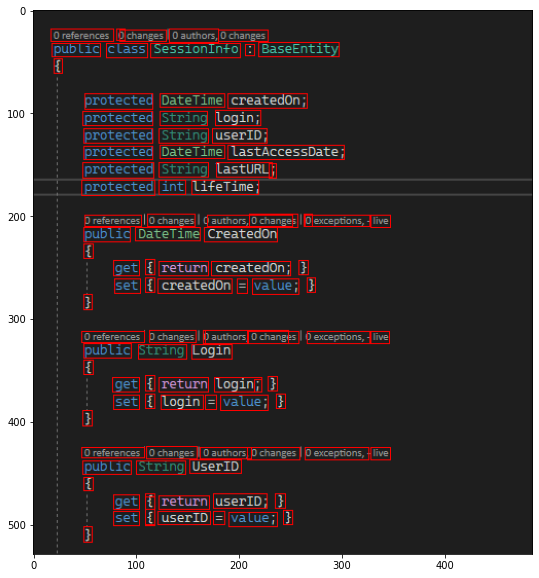

In [4]:
img = ocr_model.get_image_with_box_from_path('MyExample/im_20230301_181215.jpg')

plt.figure(figsize=(10,10))
plt.imshow(img)

100%|██████████| 2/2 [00:00<00:00, 28.67it/s]


publc class мyclass: :asecass
{
  publc patemmme createbate;
   rotected string wgrn
          _
   rotected strrng login1111; ! ':
   protected strrng lognй11; 1 ! !];
   publc patemmme # modifypate:
  protected strrng logmптмм; 1 ' !];
  publc strrng urop11 1 ' { get; set; :]; }
  prfvate strrng _prop:
  publc strng гrор
  {
     get { return _rqpй; }
     set { _prqpт = value; }
  }
}


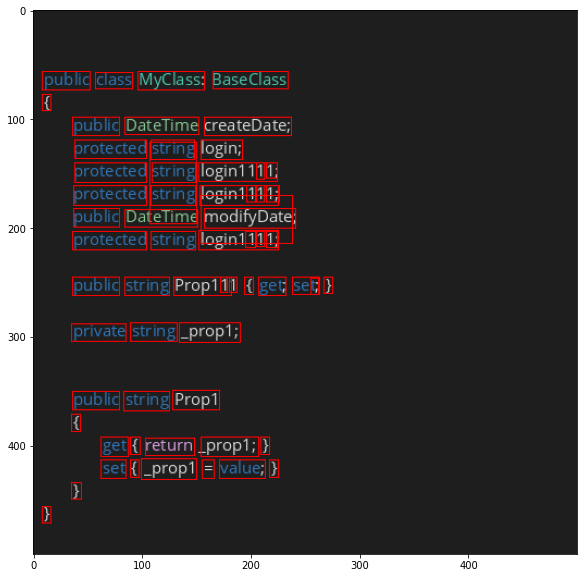

In [5]:
from MyGenerator.ImageGenerator import ImageGenerator
config = [{ 
    'fonts':['example/TextBPNPlusPlus/dataset/MyGenerator/font.ttf']
    , 'texts':[
f'''

<format color=#3077bb>public class</format> <format color=#4CC5AC>MyClass</format>: <format color=#4CC5AC>BaseClass</format>
{{
\t<format color=#3077bb>public</format> <format color=#86c691>DateTime</format> createDate;
\t<format color=#3077bb>protected string</format> login;
\t<format color=#3077bb>protected string</format> login1111;
\t<format color=#3077bb>protected string</format> login1111;
\t<format color=#3077bb>public</format> <format color=#86c691>DateTime</format> modifyDate;
\t<format color=#3077bb>protected string</format> login1111;

\t<format color=#3077bb>public string</format> Prop111 {{ <format color=#3077bb>get</format>; <format color=#3077bb>set</format>; }}

\t<format color=#3077bb>private string</format> _prop1;


\t<format color=#3077bb>public string</format> Prop1
\t{{
\t\t<format color=#3077bb>get</format> {{ <format color=#d8a0df>return</format> _prop1; }}
\t\t<format color=#3077bb>set</format> {{ _prop1 = <format color=#3077bb>value</format>; }}
\t}}
}}
'''
    ]
    , 'text_colors':['#D8D9D9']
    , 'size_images':[(500,500)]
    , 'position_texts':[(10,0),(10,10)]
    , 'font_sizes':[15]
    , 'background_colors':['#1E1E1E']
    , 'use_box':[False]#not word
    , 'box_colors':['#555555']
    , 'use_lines':['0000']
    , 'lines_colors':['#555555']
    , 'box_colors':['#555555']#not word
}]

im_gen = ImageGenerator(config)

img,box,text = im_gen.get_by_index(0)
text_result = ocr_model.recognize_image(img)
print(*text_result,sep='\n')

#img = ocr_model.get_image_with_box('MyExample/im_20230301_181215.jpg')
#plt.figure(figsize=(10,10))
#plt.imshow(img)

img_res = ocr_model.get_image_with_box(img)

plt.figure(figsize=(10,10))
plt.imshow(np.asarray(img_res))
plt.show()

100%|██████████| 2/2 [00:00<00:00, 18.46it/s]


сразу после смерти лександра возник eonpoc
тносителынс мрестолонасл млонаследника рсобенносты
ервдаки власти юсиздилмалсыв ваклионаласы в том мто никто
wв реалыных третенентоа на иарский престол
фивически не мот управлбть m ромадной '': wмперией
и в случае ивбрания мребовал oпeки
сразу после смерти александра возник вoпpoc
o тносителынс трвстотоюащвиюм трестолонасл наследника рсобенностн
передаии власти дсивдммдтбыа ваиионалась в том мто никто
wв леалыных ретеннентов на марский престол
фивически не мот управлять m романной + империей
и в случае ивбрания lребовал oпeки


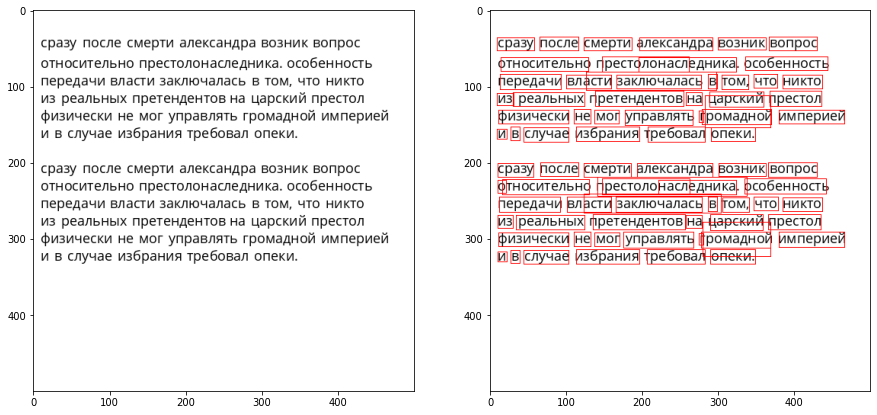

In [6]:
from MyGenerator.ImageGenerator import ImageGenerator
#  its ok:
# config = [{
#     'fonts':['example/TextBPNPlusPlus/dataset/MyGenerator/font.ttf']
#     , 'texts':[
# f'''

# \t select * 
# \t\t from user where name = @name

# '''
#     ]
#     , 'text_colors':['#030303']
#     , 'size_images':[(500,500)]

#     , 'position_texts':[(15,10),(5,50),(5,20),(15,120)]
#     , 'font_sizes':[18]
#     , 'background_colors':['#ffffff']
#     , 'use_box':[False]#not word
#     , 'box_colors':['#555555']
#     , 'use_lines':['0000']
#     , 'lines_colors':['#555555']
#     , 'box_colors':['#555555']#not word
# },]
# config = [{ 
#     'fonts':['example/TextBPNPlusPlus/dataset/MyGenerator/font.ttf']
#     , 'texts':[
# f'''
# <format color=#3077bb>public class</format> <format color=#4CC5AC>myClass</format>: <format color=#4CC5AC>baseClass</format>
# {{
# \t<format color=#3077bb>public</format> <format color=#86c691>date</format> createdate;

# \t<format color=#3077bb>protected string</format> login;

# \t<format color=#3077bb>public</format> <format color=#86c691>date</format> modifydate;

# \t<format color=#3077bb>private string</format> prop;

# \t<format color=#3077bb>public string</format> property

# }}
# '''
#     ]
#     , 'text_colors':['#D8D9D9']
#     , 'size_images':[(500,500)]
#     , 'position_texts':[(10,0),(10,10)]
#     , 'font_sizes':[18]
#     , 'background_colors':['#1E1E1E']
#     , 'use_box':[False]#not word
#     , 'box_colors':['#555555']
#     , 'use_lines':['0000','0000']
#     , 'lines_colors':['#555555']
#     , 'box_colors':['#555555']#not word
# }]
config = [{ 
    'fonts':['example/TextBPNPlusPlus/dataset/MyGenerator/font.ttf']
    , 'texts':[
f'''
сразу после смерти александра возник вопрос
относительно престолонаследника. особенность
передачи власти заключалась в том, что никто
из реальных претендентов на царский престол
физически не мог управлять громадной империей
и в случае избрания требовал опеки.

сразу после смерти александра возник вопрос
относительно престолонаследника. особенность
передачи власти заключалась в том, что никто
из реальных претендентов на царский престол
физически не мог управлять громадной империей
и в случае избрания требовал опеки.
'''
    ]
    , 'text_colors':['#000000']
    , 'size_images':[(500,500)]
    , 'position_texts':[(10,0),(10,10)]
    , 'font_sizes':[18]
    , 'background_colors':['#ffffff']
    , 'use_box':[False]#not word
    , 'box_colors':['#555555']
    , 'use_lines':['0000','0000']
    , 'lines_colors':['#555555']
    , 'box_colors':['#555555']#not word
}]


im_gen = ImageGenerator(config)

img,box,text = im_gen.get_by_index(0)
text_result = ocr_model.recognize_image(img)
print(*text_result,sep='\n')

#img = ocr_model.get_image_with_box('MyExample/im_20230301_181215.jpg')
#plt.figure(figsize=(10,10))
#plt.imshow(img)

_,axs = plt.subplots(1,2,figsize=(15,20))

axs[0].imshow(img)

img_res = ocr_model.get_image_with_box(img)

#img_res = image_box_show(img_res,box,color=(0,0,255))

#plt.figure(figsize=(10,10))
axs[1].imshow(np.asarray(img_res))
plt.show()